In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


In [19]:
property_types = df['Type'].unique()
property_types

array(['house', 'unit', 'townhouse'], dtype=object)

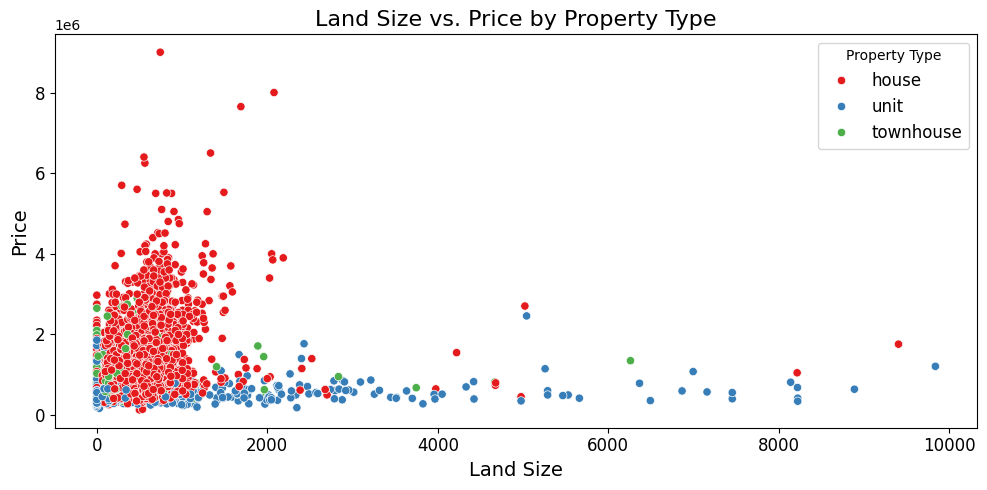

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type', palette='Set1', alpha=1)
plt.title('Land Size vs. Price by Property Type', fontsize=16)
plt.xlabel('Land Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Property Type', fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
avg_price_per_year = df.groupby('YearBuilt')['Price'].mean().reset_index

In [32]:
df_cleaned = df.dropna(subset=['YearBuilt', 'Price'])

In [41]:
print(avg_price_per_year)

<bound method Series.reset_index of YearBuilt
1830.0    8.550000e+05
1850.0    1.347000e+06
1854.0    3.310000e+06
1856.0    2.260000e+06
1860.0    1.980000e+06
              ...     
2014.0    9.519831e+05
2015.0    1.255708e+06
2016.0    1.529026e+06
2017.0    1.041406e+06
2018.0    1.310000e+06
Name: Price, Length: 135, dtype: float64>


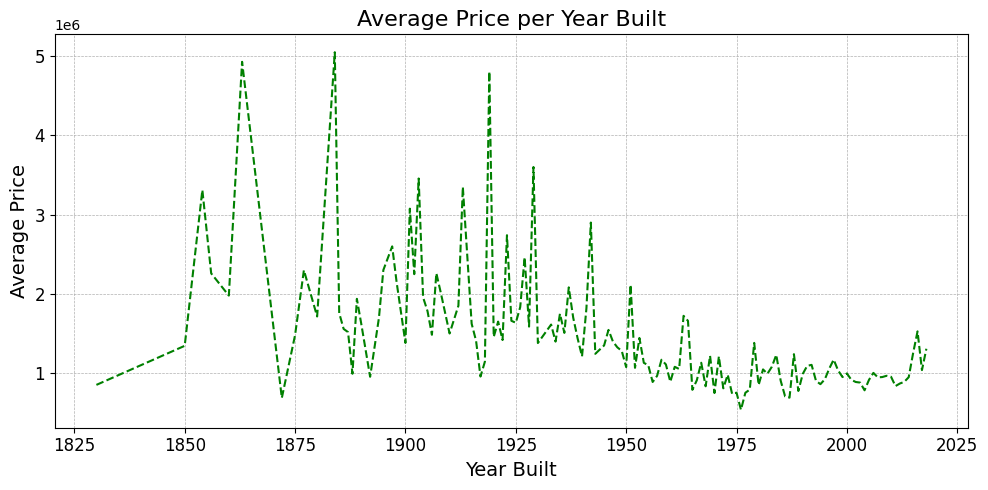

In [51]:
plt.figure(figsize=(10,5))
sor=df_cleaned.sort_values(by='YearBuilt')
sns.lineplot(data=sor, x='YearBuilt', y='Price', color='green', linestyle='--', ci=None)
plt.title('Average Price per Year Built', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=1)
plt.tight_layout()
plt.show()

In [52]:
df_cleaned = df.dropna(subset=['Regionname', 'Price'])

In [53]:
avg_price_per_region = df_cleaned.groupby('Regionname')['Price'].mean().reset_index()

In [54]:
avg_price_per_region_sorted = avg_price_per_region.sort_values(by='Price', ascending=False)

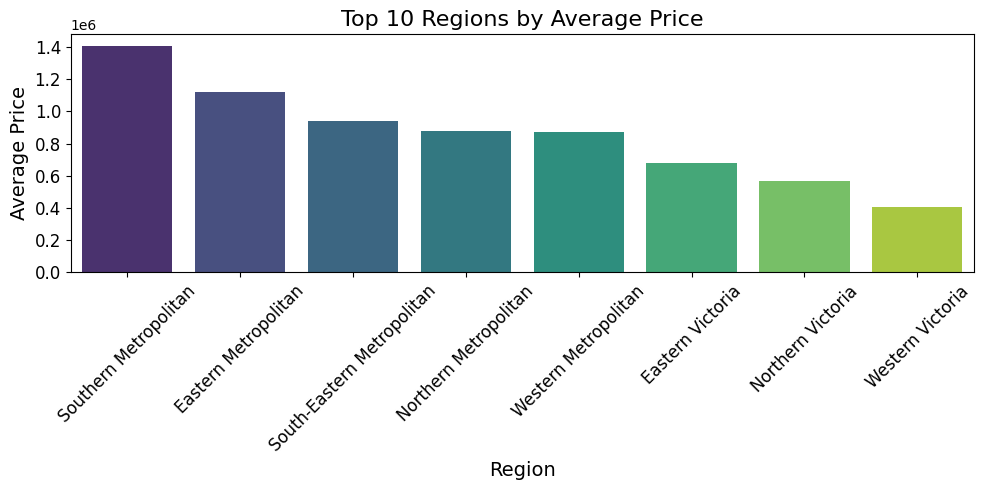

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(data=avg_price_per_region_sorted.head(10), x='Regionname', y='Price', palette='viridis')
plt.title('Top 10 Regions by Average Price', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [57]:
df_cleaned = df.dropna(subset=['Price'])

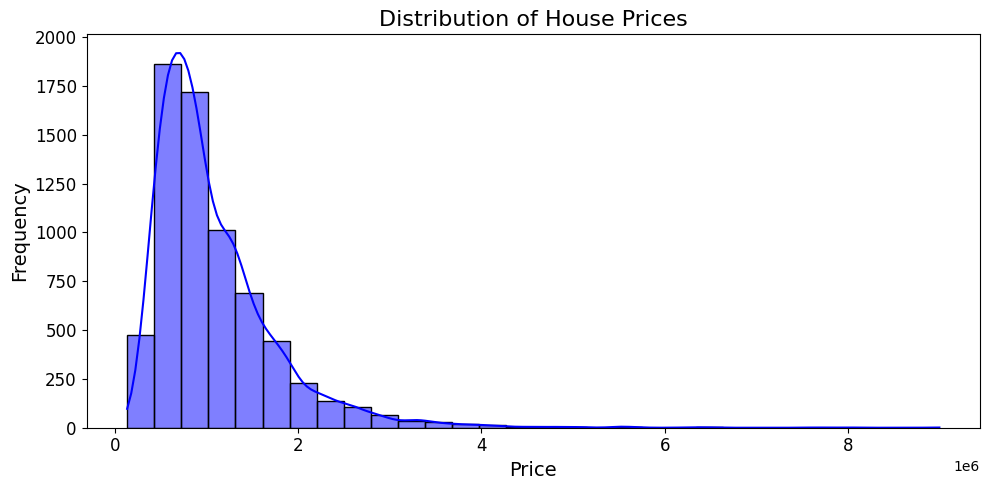

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cleaned, x='Price', bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [59]:
df_cleaned = df.dropna(subset=['YearBuilt', 'Regionname'])

<function matplotlib.pyplot.show(close=None, block=None)>

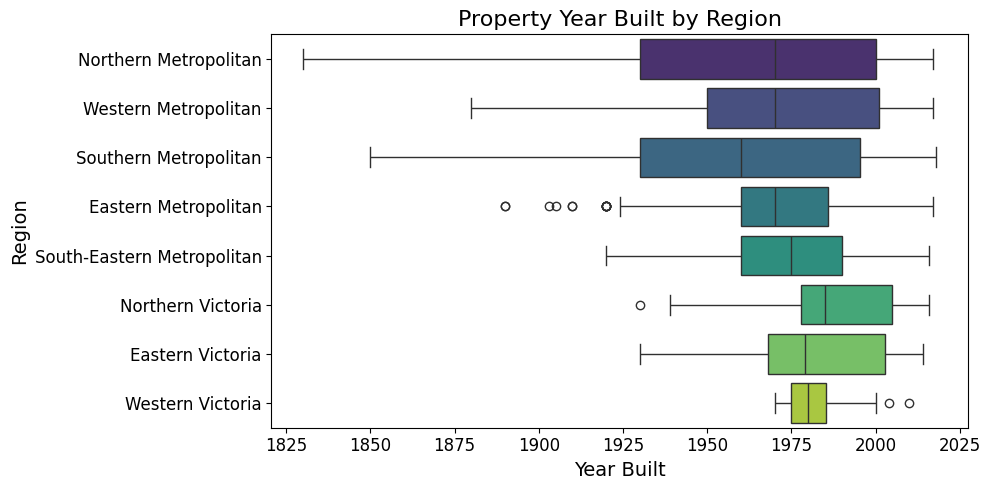

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='YearBuilt', y='Regionname', orient='h', palette='viridis')
plt.title('Property Year Built by Region', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show